# Decomposing the Heisenberg model using symmeteries

## Following https://arxiv.org/pdf/1101.3281.pdf

In [5]:
from qiskit import quantum_info as qi
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format

In [6]:
def I0(L):
    label = ""
    for i in range(0,L):
        label += "I"
    return qi.Operator.from_label(label).data

def Sx(l,L):
    label = ""
    for i in range(0,l):
        label += "I"
    label += "X"
    for i in range(l+1,L):
        label += "I"
    return qi.Operator.from_label(label).data

def Sy(l,L):
    label = ""
    for i in range(0,l):
        label += "I"
    label += "Y"
    for i in range(l+1,L):
        label += "I"
    return qi.Operator.from_label(label).data

def Sz(l,L):
    label = ""
    for i in range(0,l):
        label += "I"
    label += "Z"
    for i in range(l+1,L):
        label += "I"
    return qi.Operator.from_label(label).data
    
def Sp(l,L):
    return Sx(0,L)+Sy(0,L)

def Sm(l,L):
    return Sx(0,L)-Sy(0,L)

In [23]:
#Computes the braket of an operator <psi_a| U |psi_b>
def bkt(psi_a,U,psi_b):
    return np.dot(np.conjugate(psi_a),np.dot(U,psi_b))

#Computes the dot product of matrices and vectors in a list
def Mdot(Ol):
    m = Ol[0]
    for i in range(1,len(Ol)):
        m = np.dot(Ol[i],m)
    return m

In [21]:
def Hf(Jx,Jy,Jz,L):
    h=0
    for i in range(0,L-1):
        h+= Jx*np.dot(Sz(i,L),Sz(i+1,L))
        h+= Jy*np.dot(Sx(i,L),Sx(i+1,L))
        h+= Jz*np.dot(Sy(i,L),Sy(i+1,L))
    h+= Jx*np.dot(Sz(L-1,L),Sz(0,L))
    h+= Jy*np.dot(Sx(L-1,L),Sx(0,L))
    h+= Jz*np.dot(Sy(L-1,L),Sy(0,L))
    return h
        

In [58]:
from random import random

N = 4
H = Hf(0.1,0.2,0.3,N)
v0t = np.array([random() for i in range(0,2**N)])

v0 = v0t/np.sqrt(bkt(v0t,I0(N),v0t))
a0 = bkt(v0,H,v0)

v1t = Mdot([H,v0]) - a0*v0
b1 = np.sqrt(bkt(v1t,I0(N),v1t))
v1 = (1/b1)*v1t
a1 = bkt(v1,H,v1)
 
v2t = Mdot([H,v1]) - a1*v1 - b1*v0
b2 = np.sqrt(bkt(v2t,I0(N),v2t))
v2 = (1/b2)*v2t
a2 = bkt(v2,H,v2)

v3t = Mdot([H,v2]) - a2*v2 - b2*v1
b3 = np.sqrt(bkt(v3t,I0(N),v3t))
v3 = (1/b3)*v3t
a3 = bkt(v3,H,v3)

In [101]:
#Set Hamiltonian
N = 4
H = Hf(0.1,0.2,0.3,N)

#Define containers
vt_l = []
v_l = []
a_l = []
b_l = []

#Initialize
v0t = np.array([random() for i in range(0,2**N)])
v0 = v0t/np.sqrt(bkt(v0t,I0(N),v0t))
a0 = bkt(v0,H,v0)
vt_l.append(v0t)
v_l.append(v0)
a_l.append(a0)
b_l.append(0)

#first step
v1t = Mdot([H,v0]) - a0*v0
b1 = np.sqrt(bkt(v1t,I0(N),v1t))
v1 = (1/b1)*v1t
a1 = bkt(v1,H,v1)
vt_l.append(v1t)
v_l.append(v1)
a_l.append(a1)
b_l.append(b1)



#Iterate through further steps
for i in range(2,10):
    vit = Mdot([H,v_l[i-1]]) - a_l[i-1]*v_l[i-1] - b_l[i-1]*v_l[i-2]
    bi = np.sqrt(bkt(vit,I0(N),vit))
    vi = (1/bi)*vit
    ai = bkt(vi,H,vi)
    vt_l.append(vit)
    v_l.append(vi)
    a_l.append(ai)
    b_l.append(bi)
b_l = np.delete(b_l,0)

In [103]:
from scipy.linalg import eigh_tridiagonal 

e,y = eigh_tridiagonal(np.real(a_l),np.real(b_l))

In [106]:
from scipy.linalg import eig

e0,y0 = eig(H)

In [107]:
e0

array([-1.64523623e+00+0.00000000e+00j,  1.28076471e+00+0.00000000e+00j,
        3.64471523e-01+0.00000000e+00j,  4.00000000e-01+0.00000000e+00j,
       -1.20000000e+00+0.00000000e+00j, -8.00000000e-01+0.00000000e+00j,
        1.20000000e+00+0.00000000e+00j,  8.00000000e-01+0.00000000e+00j,
       -8.92023574e-17+0.00000000e+00j, -1.46122710e-18+0.00000000e+00j,
       -4.00000000e-01+0.00000000e+00j, -6.75458196e-18+4.81482486e-34j,
        1.48243981e-17+1.96389829e-18j,  1.48243981e-17-1.96389829e-18j,
        2.56615572e-18+7.65534257e-37j,  5.70213702e-34+0.00000000e+00j])

In [108]:
e

array([-1.64523623e+00, -1.20000000e+00, -8.00000000e-01, -4.00000000e-01,
        2.22044605e-16,  3.64471523e-01,  4.00000000e-01,  8.00000000e-01,
        1.20000000e+00,  1.28076471e+00])

In [116]:
#Set Hamiltonian
N = 7
H = Hf(0.1,0.2,0.3,N)

#Define containers
e_l = []
t_l = []

for T in range(2,20):
    vt_l = []
    v_l = []
    a_l = []
    b_l = []

    #Initialize
    v0t = np.array([random() for i in range(0,2**N)])
    v0 = v0t/np.sqrt(bkt(v0t,I0(N),v0t))
    a0 = bkt(v0,H,v0)
    vt_l.append(v0t)
    v_l.append(v0)
    a_l.append(a0)
    b_l.append(0)

    #first step
    v1t = Mdot([H,v0]) - a0*v0
    b1 = np.sqrt(bkt(v1t,I0(N),v1t))
    v1 = (1/b1)*v1t
    a1 = bkt(v1,H,v1)
    vt_l.append(v1t)
    v_l.append(v1)
    a_l.append(a1)
    b_l.append(b1)



    #Iterate through further steps
    for i in range(2,T):
        vit = Mdot([H,v_l[i-1]]) - a_l[i-1]*v_l[i-1] - b_l[i-1]*v_l[i-2]
        bi = np.sqrt(bkt(vit,I0(N),vit))
        vi = (1/bi)*vit
        ai = bkt(vi,H,vi)
        vt_l.append(vit)
        v_l.append(vi)
        a_l.append(ai)
        b_l.append(bi)
    b_l = np.delete(b_l,0)
    e,y = eigh_tridiagonal(np.real(a_l),np.real(b_l))
    e_l.append(e[0])
    t_l.append(T)

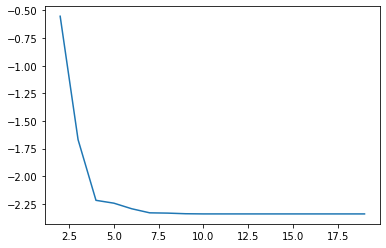

In [117]:
import matplotlib.pyplot as plt

plt.plot(t_l,e_l)